In [4]:
import pandas as pd
import numpy as np


In [6]:
df=pd.read_csv("AirQuality.csv",encoding='cp1252')

C:\Users\Abhijeet\AppData\Local\Temp\ipykernel_12376\2906436945.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("AirQuality.csv",encoding='cp1252')


In [ ]:
df.head(5)

In [ ]:
df.describe()

In [9]:
df.shape

(435742, 13)

In [ ]:
df.info()

In [11]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [12]:
df.count()

stn_code                       291665
sampling_date                  435739
state                          435742
location                       435739
agency                         286261
type                           430349
so2                            401096
no2                            419509
rspm                           395520
spm                            198355
location_monitoring_station    408251
pm2_5                            9314
date                           435735
dtype: int64

In [ ]:
df.info()

In [1]:

df = df.drop(['stn_code','agency', 'location_monitoring_station'],axis=1)   

NameError: name 'df' is not defined

In [24]:
df.isna().sum()

sampling_date         3
state                 0
location              3
type               5393
so2               34646
no2               16233
rspm              40222
spm              237387
pm2_5            426428
date                  7
dtype: int64

In [21]:
df = df.dropna(subset=['state'])

In [23]:
df.isna().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [ ]:
df.columns

In [32]:
df['type'].unique()

array(['Residential, Rural and other Areas', 'Industrial Area', nan,
       'Sensitive Area', 'Industrial Areas', 'Residential and others',
       'Sensitive Areas', 'Industrial', 'Residential', 'RIRUO',
       'Sensitive'], dtype=object)

In [34]:
types = {
    
    "Residential" : "K",
    "Residential and others" : "RO",
    "Industrial Area":"I" ,
    "Industrial Areas" : "I",
    "Industrial" : "I" ,
    "Sensitive Area": "s",
    "Sensitive Areas":"s",
    "Sensitive":"s",
    "NaN":"PRO",
    "Residential, Rural and other Areas":"MO"
 }

In [36]:
df.type = df.type.replace(types)

In [37]:
df['type'].unique()

array(['MO', 'I', nan, 's', 'RO', 'K', 'RIRUO'], dtype=object)

In [40]:
df.head()

,sampling_date,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,February - M021990,Andhra Pradesh,Hyderabad,MO,4.8,17.4,NaN,NaN,NaN,1990-02-01
1,February - M021990,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,February - M021990,Andhra Pradesh,Hyderabad,MO,6.2,28.5,NaN,NaN,NaN,1990-02-01
3,March - M031990,Andhra Pradesh,Hyderabad,MO,6.3,14.7,NaN,NaN,NaN,1990-03-01
4,March - M031990,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [ ]:
df.info()

In [99]:
df['date']=pd.to_datetime(df['date'], errors="coerce")
df.head(6)

,sampling_date,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,February - M021990,0,Hyderabad,1.0,4.8,17.4,108.832784,220.78348,40.791467,1990-02-01,1990.0
1,February - M021990,0,Hyderabad,2.0,3.1,7.0,108.832784,220.78348,40.791467,1990-02-01,1990.0
2,February - M021990,0,Hyderabad,1.0,6.2,28.5,108.832784,220.78348,40.791467,1990-02-01,1990.0
3,March - M031990,0,Hyderabad,1.0,6.3,14.7,108.832784,220.78348,40.791467,1990-03-01,1990.0
4,March - M031990,0,Hyderabad,2.0,4.7,7.5,108.832784,220.78348,40.791467,1990-03-01,1990.0
5,March - M031990,0,Hyderabad,1.0,6.4,25.7,108.832784,220.78348,40.791467,1990-03-01,1990.0


In [101]:
df['year']=df.date.dt.year
df.head()

,sampling_date,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,February - M021990,0,Hyderabad,1.0,4.8,17.4,108.832784,220.78348,40.791467,1990-02-01,1990.0
1,February - M021990,0,Hyderabad,2.0,3.1,7.0,108.832784,220.78348,40.791467,1990-02-01,1990.0
2,February - M021990,0,Hyderabad,1.0,6.2,28.5,108.832784,220.78348,40.791467,1990-02-01,1990.0
3,March - M031990,0,Hyderabad,1.0,6.3,14.7,108.832784,220.78348,40.791467,1990-03-01,1990.0
4,March - M031990,0,Hyderabad,2.0,4.7,7.5,108.832784,220.78348,40.791467,1990-03-01,1990.0


In [103]:
COLS = ['so2','no2', 'rspm', 'spm', 'pm2_5']

In [ ]:
df.info

In [107]:
import numpy as np
from sklearn.impute import SimpleImputer

In [53]:
imputer = SimpleImputer(missing_values = np.nan, strategy='mean')

In [54]:
df[COLS] = imputer.fit_transform(df[COLS])

In [ ]:
df.head()

In [56]:
df.nunique()

sampling_date    5485
state              37
location          304
type                6
so2              4198
no2              6865
rspm             6066
spm              6669
pm2_5             434
date             5067
year               29
dtype: int64

In [57]:
df.duplicated().sum()

1135

In [58]:
df.drop_duplicates()

,sampling_date,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,February - M021990,Andhra Pradesh,Hyderabad,MO,4.800000,17.400000,108.832784,220.78348,40.791467,1990-02-01,1990.0
1,February - M021990,Andhra Pradesh,Hyderabad,I,3.100000,7.000000,108.832784,220.78348,40.791467,1990-02-01,1990.0
2,February - M021990,Andhra Pradesh,Hyderabad,MO,6.200000,28.500000,108.832784,220.78348,40.791467,1990-02-01,1990.0
3,March - M031990,Andhra Pradesh,Hyderabad,MO,6.300000,14.700000,108.832784,220.78348,40.791467,1990-03-01,1990.0
4,March - M031990,Andhra Pradesh,Hyderabad,I,4.700000,7.500000,108.832784,220.78348,40.791467,1990-03-01,1990.0
...,...,...,...,...,...,...,...,...,...,...,...
435737,24-12-15,West Bengal,ULUBERIA,RIRUO,22.000000,50.000000,143.000000,220.78348,40.791467,2015-12-24,2015.0
435738,29-12-15,West Bengal,ULUBERIA,RIRUO,20.000000,46.000000,171.000000,220.78348,40.791467,2015-12-29,2015.0
435739,NaN,andaman-and-nicobar-islands,NaN,NaN,10.829414,25.809623,108.832784,220.78348,40.791467,NaT,NaN
435740,NaN,Lakshadweep,NaN,NaN,10.829414,25.809623,108.832784,220.78348,40.791467,NaT,NaN


In [59]:
df.head()

,sampling_date,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,February - M021990,Andhra Pradesh,Hyderabad,MO,4.8,17.4,108.832784,220.78348,40.791467,1990-02-01,1990.0
1,February - M021990,Andhra Pradesh,Hyderabad,I,3.1,7.0,108.832784,220.78348,40.791467,1990-02-01,1990.0
2,February - M021990,Andhra Pradesh,Hyderabad,MO,6.2,28.5,108.832784,220.78348,40.791467,1990-02-01,1990.0
3,March - M031990,Andhra Pradesh,Hyderabad,MO,6.3,14.7,108.832784,220.78348,40.791467,1990-03-01,1990.0
4,March - M031990,Andhra Pradesh,Hyderabad,I,4.7,7.5,108.832784,220.78348,40.791467,1990-03-01,1990.0


In [60]:
df['type'].value_counts()

type
MO       179014
I        148071
RO        86791
s         15011
RIRUO      1304
K           158
Name: count, dtype: int64

In [61]:
df['type'] = df['type'].replace({ 'MO':1, 'I':2, 's':3 , 'RO':4, 'K':5, 'RIRUO':6 })


C:\Users\Abhijeet\AppData\Local\Temp\ipykernel_12376\2897716696.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['type'] = df['type'].replace({ 'MO':1, 'I':2, 's':3 , 'RO':4, 'K':5, 'RIRUO':6 })


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   sampling_date  435739 non-null  object        
 1   state          435742 non-null  object        
 2   location       435739 non-null  object        
 3   type           430349 non-null  float64       
 4   so2            435742 non-null  float64       
 5   no2            435742 non-null  float64       
 6   rspm           435742 non-null  float64       
 7   spm            435742 non-null  float64       
 8   pm2_5          435742 non-null  float64       
 9   date           435735 non-null  datetime64[ns]
 10  year           435735 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 36.6+ MB


In [63]:
df['type']

0         1.0
1         2.0
2         1.0
3         1.0
4         2.0
         ... 
435737    6.0
435738    6.0
435739    NaN
435740    NaN
435741    NaN
Name: type, Length: 435742, dtype: float64

In [76]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['state'] =labelencoder.fit_transform(df['state'])
df.head()

,sampling_date,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,February - M021990,0,Hyderabad,1.0,4.8,17.4,108.832784,220.78348,40.791467,1990-02-01,1990.0
1,February - M021990,0,Hyderabad,2.0,3.1,7.0,108.832784,220.78348,40.791467,1990-02-01,1990.0
2,February - M021990,0,Hyderabad,1.0,6.2,28.5,108.832784,220.78348,40.791467,1990-02-01,1990.0
3,March - M031990,0,Hyderabad,1.0,6.3,14.7,108.832784,220.78348,40.791467,1990-03-01,1990.0
4,March - M031990,0,Hyderabad,2.0,4.7,7.5,108.832784,220.78348,40.791467,1990-03-01,1990.0


In [78]:
dfAndhra = df[df['state']==0]


In [80]:
dfAndhra

,sampling_date,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,February - M021990,0,Hyderabad,1.0,4.8,17.4,108.832784,220.78348,40.791467,1990-02-01,1990.0
1,February - M021990,0,Hyderabad,2.0,3.1,7.0,108.832784,220.78348,40.791467,1990-02-01,1990.0
2,February - M021990,0,Hyderabad,1.0,6.2,28.5,108.832784,220.78348,40.791467,1990-02-01,1990.0
3,March - M031990,0,Hyderabad,1.0,6.3,14.7,108.832784,220.78348,40.791467,1990-03-01,1990.0
4,March - M031990,0,Hyderabad,2.0,4.7,7.5,108.832784,220.78348,40.791467,1990-03-01,1990.0
...,...,...,...,...,...,...,...,...,...,...,...
26363,13-12-15,0,Rajahmundry,2.0,7.0,13.0,71.000000,220.78348,40.791467,2015-12-13,2015.0
26364,16-12-15,0,Rajahmundry,2.0,7.0,18.0,77.000000,220.78348,40.791467,2015-12-16,2015.0
26365,19-12-15,0,Rajahmundry,2.0,8.0,23.0,64.000000,220.78348,40.791467,2015-12-19,2015.0
26366,22-12-15,0,Rajahmundry,2.0,7.0,19.0,61.000000,220.78348,40.791467,2015-12-22,2015.0


In [81]:
dfAndhra['location'].value_counts()

location
Hyderabad         7764
Visakhapatnam     7108
Vijayawada        2093
Chittoor          1003
Tirupati           986
Kurnool            857
Patancheru         698
Guntur             629
Nalgonda           618
Ramagundam         554
Nellore            408
Khammam            385
Warangal           336
Ananthapur         324
Ongole             317
Kadapa             316
Srikakulam         315
Rajahmundry        311
Eluru              300
Vishakhapatnam     297
Kakinada           288
Vizianagaram       282
Sangareddy          85
Karimnagar          67
Nizamabad           27
Name: count, dtype: int64

In [84]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(sparse_output=False, handle_unknown='error', drop='first')


In [86]:
pd.DataFrame(onehotencoder.fit_transform(dfAndhra[['location']]))

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
dfAndhra['location'].value_counts()

location
Hyderabad         7764
Visakhapatnam     7108
Vijayawada        2093
Chittoor          1003
Tirupati           986
Kurnool            857
Patancheru         698
Guntur             629
Nalgonda           618
Ramagundam         554
Nellore            408
Khammam            385
Warangal           336
Ananthapur         324
Ongole             317
Kadapa             316
Srikakulam         315
Rajahmundry        311
Eluru              300
Vishakhapatnam     297
Kakinada           288
Vizianagaram       282
Sangareddy          85
Karimnagar          67
Nizamabad           27
Name: count, dtype: int64

In [109]:
df.isnull().sum()

sampling_date       3
state               0
location            3
type             5393
so2                 0
no2                 0
rspm                0
spm                 0
pm2_5               0
date                7
year                7
dtype: int64

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
file_path = "Heart.csv"
df = pd.read_csv(file_path)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [6]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [7]:
df = df.dropna()

In [8]:
X = df.select_dtypes(include=[np.number]).drop(columns=['Age'], errors='ignore')
y = df['Age']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [13]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 51.78030714419955
R-squared Score: 0.40181402677868727


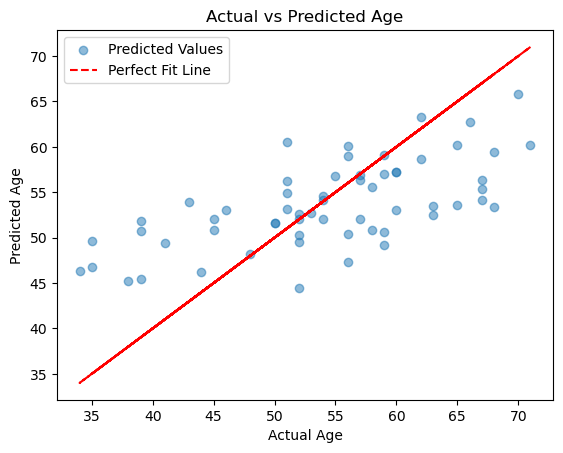

In [14]:
plt.scatter(y_test, y_pred, alpha=0.5, label="Predicted Values")
plt.plot(y_test, y_test, color="red", linestyle="--", label="Perfect Fit Line") 
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual vs Predicted Age")
plt.legend()
plt.show()
